## Modelowanie Wieloagentowe

## 2021/2022, semestr zimowy, studia sobotnio-niedzielne

## Uladzislau Darhevich 108519

[kontakt](mailto:ud108519@student.sgh.waw.pl)

In [1]:
using Statistics
using PyCall
using Random
using Plots
using Distributions
using HypothesisTests
using Printf
Random.seed!(1234)

MersenneTwister(1234)

1. Napisz funkcję `f(x, y)`, która liczy średnią liczb od `1` do `x` ze skokiem `y`. Uruchom tę funkcję dla `x=numeryczna_część_numeru_indeksu` i `y=1/numeryczna_część_numeru_indeksu`

In [2]:
function f(x,y)
    return mean([1:y:x;])
end

f (generic function with 1 method)

In [3]:
#Ilość liczb od 1 do 108519 z krokem 1/108519 jest bardzo duza, zmieniłem krok na 50/108519
n_index = 108519
@time begin
res_julia = f(n_index, 50/n_index)
res_julia
end

 11.003346 seconds (332.73 k allocations: 1.774 GiB, 0.14% gc time, 2.32% compilation time)


54259.99980648551

In [25]:
#ciekawie było porównać z Pythonem
np = pyimport("numpy");

In [5]:
@time begin
res_py = np.mean(np.arange(1, n_index + 1, 50/n_index))
res_py
end    

 56.488604 seconds (1.38 M allocations: 1.835 GiB, 0.82% gc time, 0.02% compilation time)


54260.49994931354

2. Wylosuj 1000 liczb ze standardowego rozkładu normalnego. Narysuj ich histogram:

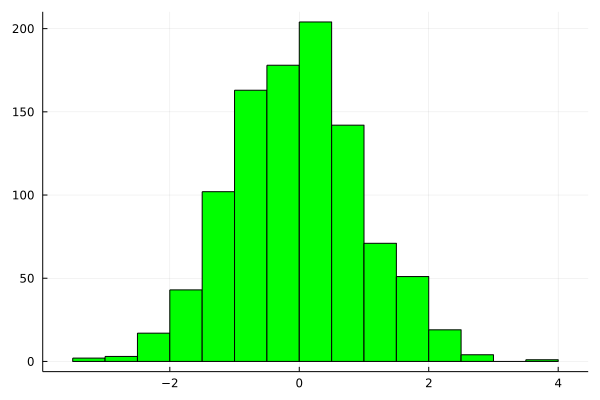

In [6]:
histogram(randn(1000), legend=false, color="lime")

3. Wylosuj 20 liczb z rozkładu jednostajnego na przedziale [0,1]. Wyznacz 95% przedział ufności dla średniej tych liczb
dla 10000 powtórzeń próby bootstrapowej.

In [7]:
function f3(r, q)
# r - ilość powtórzeń , q - ilość liczb losowanych
    s = [mean(rand(q)) for _ in 1:r]
    m = mean(s)
    sd = std(s)
    ci_low = m - 1.96 * sd / sqrt(r)
    ci_high = m + 1.96 * sd / sqrt(r)
    @printf("Przedział ufności:\nDolna granica %s\nGórna granica %s", ci_low, ci_high)
end

# za pomocą Distributions i HypothesisTests    
function f3_adv(r, q)
# r - ilość powtórzeń , q - ilość liczb losowanych
    s = [mean(rand(q)) for _ in 1:r]
    ci = confint(OneSampleTTest(s))
    @printf("Przedział ufności:\nDolna granica %s\nGórna granica %s", ci[1], ci[2])
end

f3_adv (generic function with 1 method)

In [8]:
f3(10000, 20)

Przedział ufności:
Dolna granica 0.4975784947315824
Górna granica 0.5001249449419781

In [9]:
f3_adv(10000, 20)

Przedział ufności:
Dolna granica 0.49898956244991544
Górna granica 0.5015356111518545

4. Biorąc przykład z zadania 3 napisz funkcję, której parametrem będzie wielkość próby `n` a wynikiem szerokość przedziału ufności.
Narysuj wykres zależności szerokości przedziału ufności od `n`, gdzie `n` przyjmuje wartości od `10` do `100` z krokiem 1.

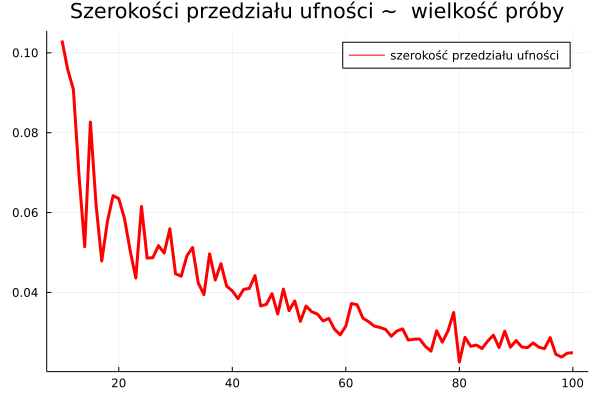

In [15]:
function f4(n)
# n - wielkość próby 
    s = [mean(rand(20)) for _ in 1:n]
    ci = confint(OneSampleTTest(s))
    return ci[2] - ci[1]
end

seq = [10:1:100;]
res = []
for i in seq
    push!(res, f4(i))
end
plot(seq, res, 
        title = "Szerokości przedziału ufności ~  wielkość próby", 
        label = "szerokość przedziału ufności", 
        lw = 3, 
        color="red")

5. Prowadzisz eksperyment, który zwraca 1 lub 0 jako wynik (np. klient kupił lub nie kupił produktu).
   Oblicz ile pomiarów należy wykonać, aby oszacować prawdopodobieństwo sukcesu z dokładnością +/- 0.05
   z prawdopodobieństwem 95%.
   Sprawdź symulacyjnie, czy wyliczona wartość jest prawidłowa.

In [16]:
function f5(p, N, w=0.05)
    """
    p - prawdopodobieństwo sukcesu
    N - początkowa wielkość próby
    w - dokładność
    """
    p = 0.5
    N = 100
    d = Binomial(1,p)
    v = rand(d, N)
    n = round(Int, 16*var(v) / w^2)
    return n
end

f5 (generic function with 2 methods)

In [21]:
n_probes = f5(0.5, 1000)
@printf("Należy wykonać nie mniej niz %s pomiarów", n_probes)

Należy wykonać nie mniej niz 1616 pomiarów

In [22]:
function f5_check(n, p)
    """
    n - wielkość próby
    p - prawdopodobieństwo sukcesu
    """
    v = rand(Binomial(1,p), n)
    ci = confint(OneSampleTTest(v))
    return ci[2] - ci[1]
end

f5_check (generic function with 1 method)

In [23]:
f5_check(n_probes, 0.5) < 0.05

true

6. Opisz na czym polega problem *exploration-exploitation* w testowaniu A/B

7. Opisz sposób działania próbkowania Thompsona w testowaniu A/B.

8. Utwórz na GitHub nowe repozytorium. Do tego repozytorium stwórz jeden pull request i zrób jego merge.